In [37]:
import networkx as nx

In [6]:
import requests
url = "http://www.ebi.ac.uk/Tools/webservices/psicquic/intact/webservices/current/search/query/pubid:17446270"

try:
    httpReq = requests.get(url, proxies=None)
except NameError:
    httpReq = requests.get(url)
ans = httpReq.text

ans




'uniprotkb:P0CW72\tuniprotkb:P0CW72\tintact:EBI-2620133|uniprotkb:Q777A5\tintact:EBI-2620133|uniprotkb:Q777A5\tpsi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)\tpsi-mi:barf1_ebvg(display_long)|uniprotkb:BARF1(gene name)|psi-mi:BARF1(display_short)|uniprotkb:33 kDa early protein(gene name synonym)|uniprotkb:p33(gene name synonym)\tpsi-mi:"MI:0397"(two hybrid array)\tCalderwood et al. (2007)\tpubmed:17446270|imex:IM-20435|mint:MINT-6769080\ttaxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")\ttaxid:10376(ebvg)|taxid:10376("Epstein-Barr virus (strain B95-8)")\tpsi-mi:"MI:0915"(physical association)\tpsi-mi:"MI:0469"(IntAct)\tintact:EBI-2620961|imex:IM-20435-3\tauthor score:+|intact-miscore:0.51\nuniprotkb:P14348\tuniprotkb:P0C704\tintact:EBI-2620158|intact:EBI-9645437|uniprotkb:Q777G5\tintact:EBI-2620975|uniprotkb:Q3KSQ5\tpsi-mi:scp_ebvb9(display_long)|un

In [15]:
import re

def mitabReader(httpText):
    for line in ans.split("\n"):
        _ = line.split("\t")
        if len(_) > 1 and _[0].startswith("uniprotkb:")\
                      and _[1].startswith("uniprotkb:"):
            yield [ _[0].replace("uniprotkb:", ""),\
                    _[1].replace("uniprotkb:", "") ]\
                  + _[2:]
                
def isMitab_EBV_EBV(mitabArray):
    reEBV   = "taxid:(1037[6-7]|82830)"
    if re.search(reEBV, mitabArray[9]) and re.search(reEBV, mitabArray[10]):
        return True
    return False

def isMitab_Human_EBV(mitabLine):
    reHuman   = "taxid:9606"
    if re.search(reHuman, mitabArray[9]) or re.search(reHuman, mitabArray[10]):
        return True
    return False





In [22]:
EBV_EBV_mitab   = []
EBV_Human_mitab = []
total = 0

for mitabArray in mitabReader(ans):
    total += 1
    if isMitab_EBV_EBV(mitabArray):
        EBV_EBV_mitab.append(mitabArray)
    elif isMitab_Human_EBV(mitabArray):
        EBV_Human_mitab.append(mitabArray)
    else : 
        raise ValueError("Je ne connais pas cette espece ==> ", mitabArray[9:11])

print(f"Nombre total d'interactions {total}, EBV-EBV {len(EBV_EBV_mitab)}")

#we need to split thelist into twao species specific lists:
# ebcv_ebv
#_ebv_sapiens
len(EBV_EBV_mitab)
len(EBV_Human_mitab)

Nombre total d'interactions 230, EBV-EBV 59


171

In [29]:
EBV_EBV_mitab[0] # 0 et 1 identifiant uniprot des deux proteine

prot_count=[]
for sublist in EBV_EBV_mitab:
    prot_count.extend(sublist[:2]) 

# Step 2: Find the distinct elements by converting the list to a set
distinct_elements = set(prot_count)

# Step 3: Count the number of distinct elements
count_distinct = len(distinct_elements)

print(count_distinct, "protéines are involved in the EBV-EBV interactions")

48 protéines are involved in the EBV-EBV interactions


In [35]:
EBV_Human_mitab

prot_count_human=[]
for sublist in EBV_Human_mitab:
    if "taxid:9606" in sublist[9]:
        prot_count_human.append(sublist[0])
    else: 
        prot_count_human.append(sublist[1])
        
count_distinct_human=len(set(prot_count_human))

prot_count_ebv=[]
for sublist in EBV_Human_mitab:
    if "taxid:9606" in sublist[9]:
        prot_count_ebv.append(sublist[1])
    else: 
        prot_count_ebv.append(sublist[0])
        
count_distinct_ebv=len(set(prot_count_ebv))

print(count_distinct_human, "human proteins and ", count_distinct_ebv, "viral proteins are involved in the EBV-Human interactions")

113 human proteins and  41 viral proteins are involved in the EBV-Human interactions


A l'aide des données MITAB et de la librarie [networkx](https://networkx.github.io/documentation/latest/
), représentez graphiquement un réseau dans lequel:

- les noeuds sont des identifiants UNIPROT

- les arêtes relient deux protéines en interaction

In [49]:
Gebv_ebv=nx.Graph()
Gebv_human=nx.Graph()

In [50]:
for sublist in EBV_EBV_mitab:
    Gebv_ebv.add_edge(sublist[0], sublist[1])
    
for sublist in EBV_Human_mitab:
    Gebv_human.add_edge(sublist[0], sublist[1])

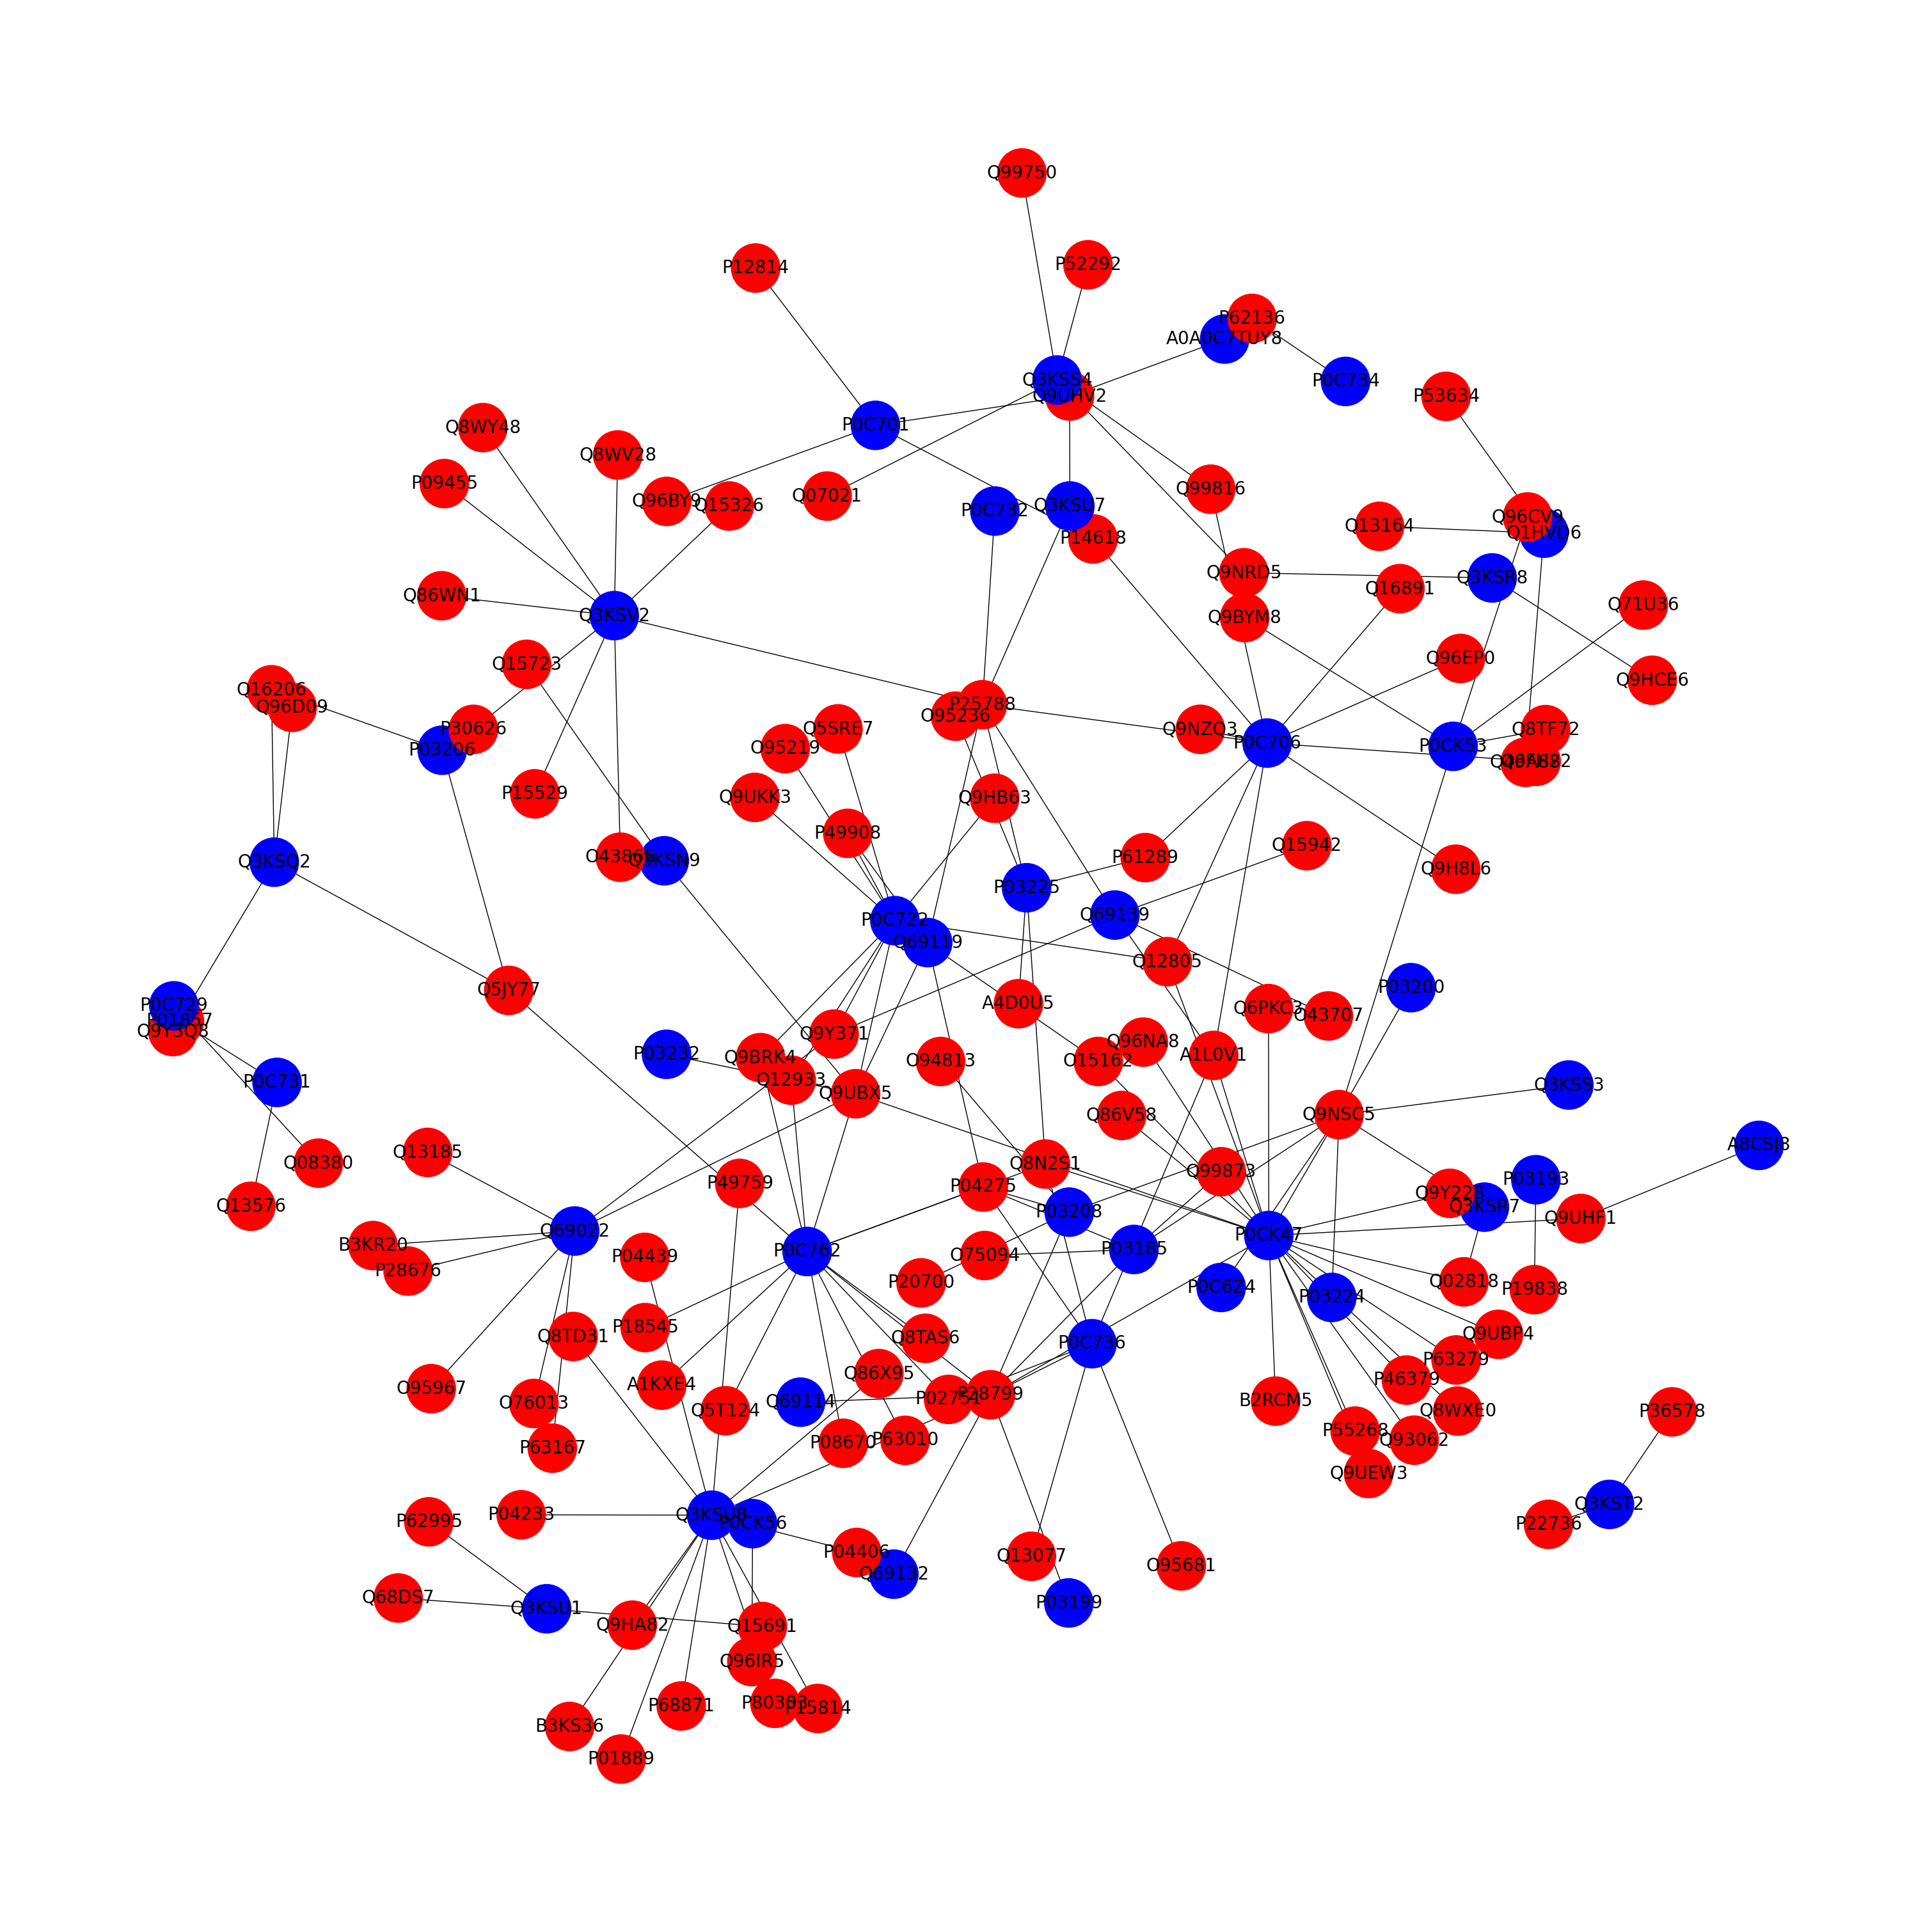

In [87]:
import matplotlib.pyplot as plt
#nx.draw(Gebv_ebv, with_labels= True, font_weight='bold')

#color nodes for human
list_color=[]
for node in Gebv_human.nodes():
    if node in prot_count_human: 
        list_color.append("red")
    else: 
        list_color.append("blue")

plt.figure(figsize=(30,30))
layout=nx.spring_layout(Gebv_human, k=0.25)
layout
nx.draw(Gebv_human,pos= layout, with_labels= True, node_color = list_color, node_size =3000, font_size=20 )
plt.show()

['blue',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'red',
 'red',
 'blue',
 'red',
 'red',
 'red',
 'blue',
 'blue',
 'red',
 'blue',
 'red',
 'blue',


In [66]:
Gebv_human.nodes()

NodeView(('Q3KSN9', 'Q15723', 'Q9UBX5', 'P0C762', 'Q9BRK4', 'P28799', 'Q8N2S1', 'P02751', 'Q8TAS6', 'P63010', 'P18545', 'Q12933', 'P08670', 'Q5T124', 'P04275', 'Q5JY77', 'A1KXE4', 'P0C701', 'Q9UHV2', 'P12814', 'P14618', 'Q96BY9', 'Q3KSR8', 'Q9NRD5', 'Q9HCE6', 'Q49A88', 'Q1HVD6', 'Q3KSR7', 'Q02818', 'Q9NSC5', 'P03225', 'P53634', 'Q13164', 'A4D0U5', 'P25788', 'P61289', 'O95236', 'P03224', 'A0A0C7TUY8', 'P0CK47', 'Q96IR5', 'P0CK56', 'P46379', 'Q12805', 'Q8WXE0', 'B2RCM5', 'Q9UEW3', 'Q9Y228', 'Q86V58', 'A1L0V1', 'P55268', 'P63279', 'O15162', 'Q9UBP4', 'Q93062', 'Q6PKC3', 'Q9UHF1', 'P03185', 'Q96NA8', 'P0CK53', 'Q9BYM8', 'O75094', 'Q99873', 'Q96CV9', 'Q71U36', 'P0C731', 'P01857', 'Q8TF72', 'Q13576', 'P0C736', 'O95681', 'Q13077', 'P03208', 'O94813', 'P20700', 'Q3KSS3', 'P03200', 'P03199', 'Q69132', 'Q3KSU7', 'P0C6Z4', 'Q3KSU8', 'P49759', 'Q8TD31', 'P04233', 'P04406', 'P68871', 'P01889', 'P04439', 'P15814', 'Q86X95', 'B3KS36', 'Q9UKK3', 'P0C722', 'P80303', 'Q9HA82', 'O95219', 'P49908', 'Q9Y37